In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import absolute_import

In [2]:
from extract_data import extract_data
from finbeat_calc import finbeat_calc
from plot_accel import plot_accel
from plot_track import plot_track

# Take position data from hardcoded folder, calc. velocities, accels
tracklist = extract_data()

# Calculate finbeat peaks and troughs

finbeats = finbeat_calc(tracklist.keys(), tracklist)

# Extract finbeat periods, amplitudes, and subsequent accel

# Plot things if desired
# plot_track(['sometrial'], tracklist)
# plot_accel(['sometrial'], tracklist)

"""If you want to plot the peaks and troughs on the position data,
uncomment section in finbeat_calc"""

C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\

'If you want to plot the peaks and troughs on the position data,\nuncomment section in finbeat_calc'

In [3]:
from plot_track import *
from plot_accel import *
from check_plots import *

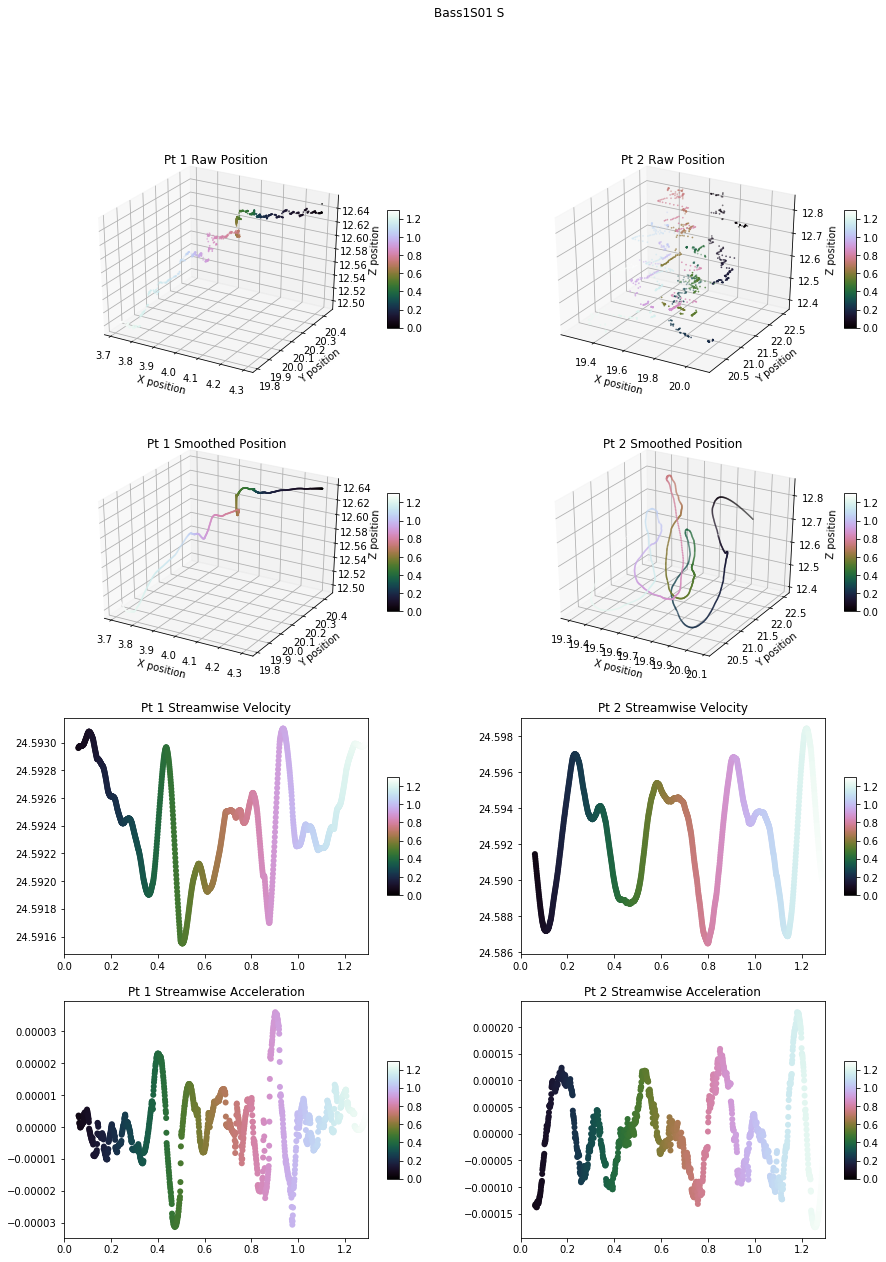

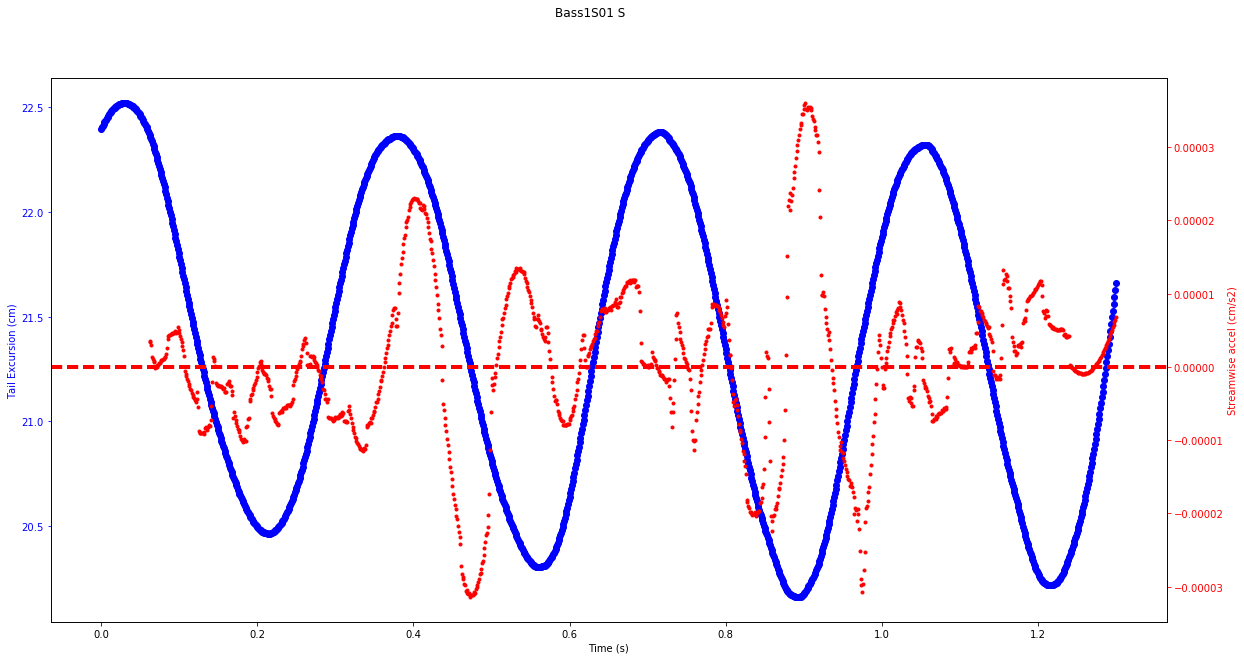

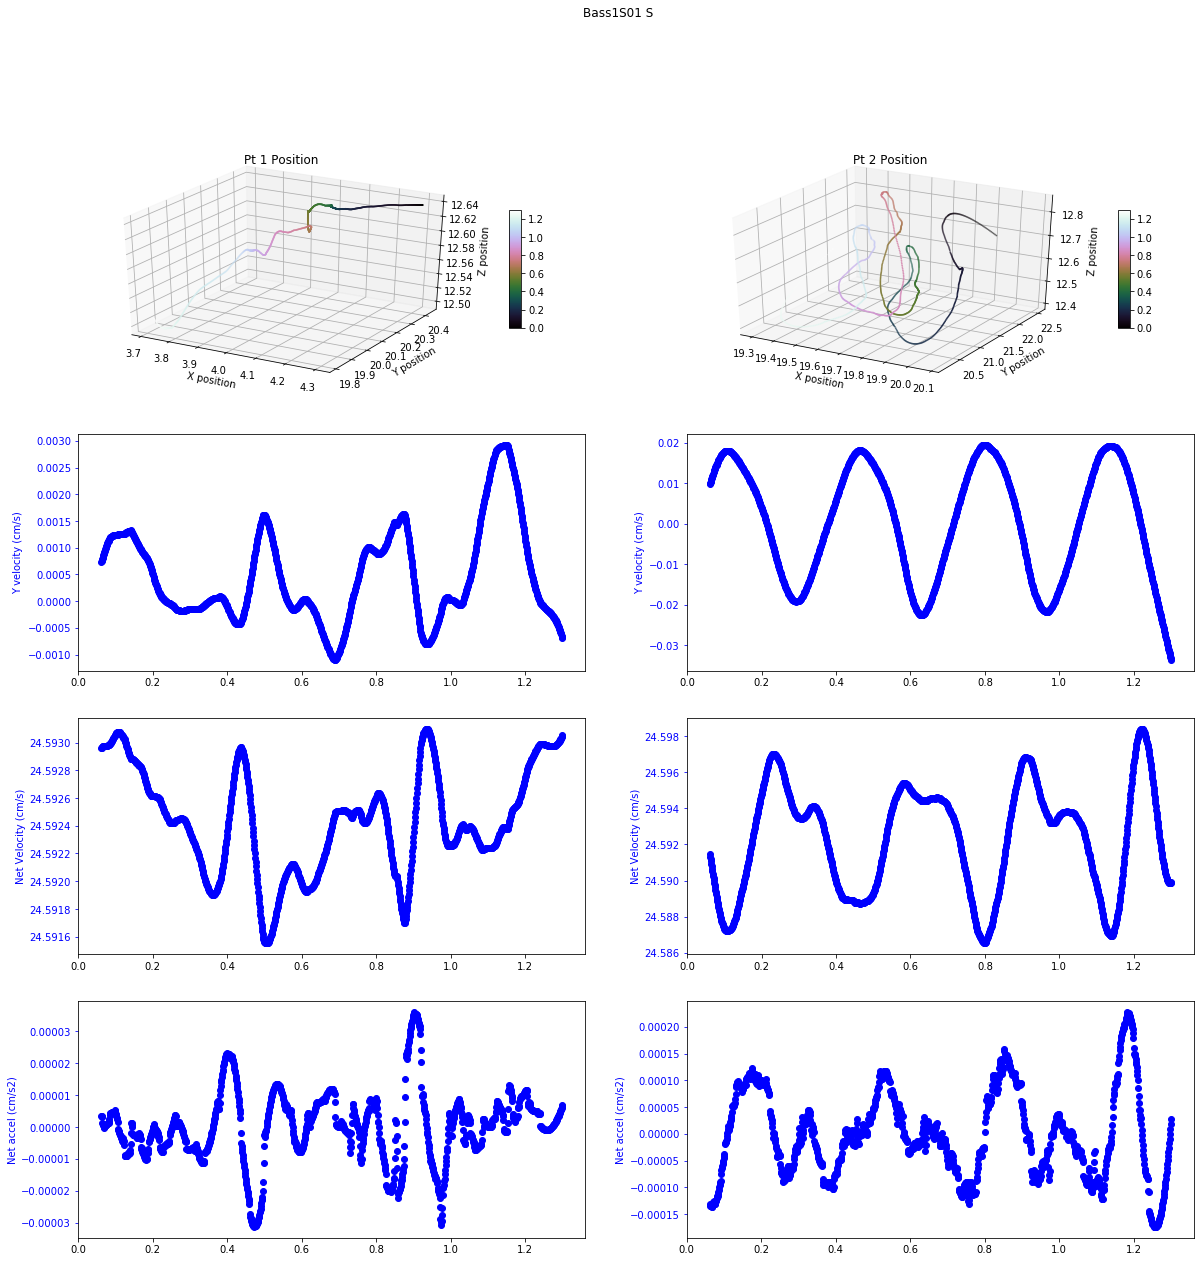

In [4]:
plot_track(['Bass1S01'], tracklist)
plot_accel(['Bass1S01'], tracklist)
check_plots(['Bass1S01'], tracklist)

In [5]:
finbeats['Bass1S01']['fb_data']

,time,type,ypos
0,0.031,P,22.518304
1,0.214,T,20.464329
2,0.381,P,22.360930
3,0.560,T,20.305538
4,0.717,P,22.381835
5,0.891,T,20.163001
6,1.056,P,22.319469
7,1.214,T,20.218677


In [142]:
import pywt
import pylab
import numpy as np

pywt.wavelist(kind='discrete')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

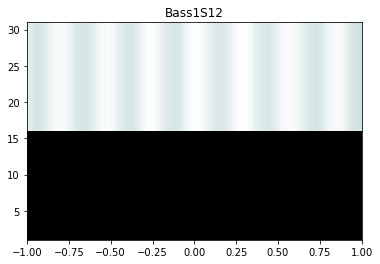

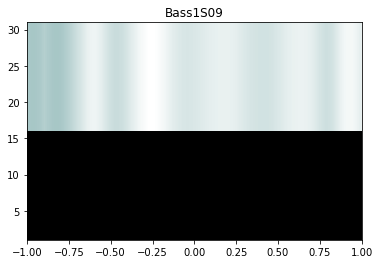

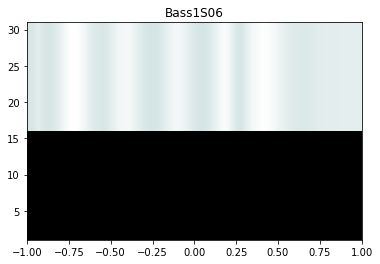

In [153]:
tracklist_subset = ['Bass1S12', 'Bass1S09', 'Bass1S06']


for trial in tracklist_subset:
    data = tracklist[trial]['data']['pt2y_smth']
    length = data.size
    FR = tracklist[trial]['FPS']
    sampling = 1.0/FR
    x = pylab.arange(0, 1, 1. / length)

    cA = []
    cD = []

    (cA, cD) = pywt.dwt(data,'sym20')

    pylab.title(trial)
    pylab.imshow((cA,cD), extent=[-1, 1, 1, 31], cmap='bone', aspect='auto') 
    pylab.show()




In [68]:
from matplotlib.backends.backend_pdf import PdfPages
from scipy import signal
with PdfPages('multipage_pdf.pdf') as pdf:
    for trial in tracklist:
        data = tracklist[trial]['data']['pt2y_smth']
        behavior = tracklist[trial]['behavior']
        data = np.array(data)
    
        widths = np.arange(1,500)
        cwtmatr = signal.cwt(data, signal.ricker, widths)
        plt.suptitle(trial + behavior)
        plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
        pdf.savefig()
        plt.close()

In [156]:
plt.imshow((cA,cD))
plt.show(extent=[-1, 1, 1, 31], cmap='bone', aspect='auto') 

TypeError: show() got an unexpected keyword argument 'extent'

In [47]:
fig = plt.figure(figsize=(20, 20))
plt.scatter(x=cwtmatr(), y = -log(cwtmatr([1])))
plt.show()

SyntaxError: invalid syntax (<ipython-input-47-74a2011bb20c>, line 2)